In [339]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler , LabelEncoder 
from sklearn.cluster import MeanShift, SpectralClustering, OPTICS, Birch, AffinityPropagation
import matplotlib.pyplot as plt 

In [340]:
data = pd.read_csv('/home/ali/Downloads/project2/Mall_Customers.csv')
data_sample = data.sample(10)

In [341]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [342]:
data.shape

(200, 5)

In [343]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [344]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [345]:
data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
4,5,Female,31,17,40
9,10,Female,30,19,72
15,16,Male,22,20,79
80,81,Male,57,54,51
197,198,Male,32,126,74
6,7,Female,35,18,6
169,170,Male,32,87,63
92,93,Male,48,60,49
162,163,Male,19,81,5
96,97,Female,47,60,47


In [346]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [347]:
data_obj =  data.select_dtypes(include=['object'])
data_inte = data.select_dtypes(include=['int64'])  
print(data_obj) 

     Gender
0      Male
1      Male
2    Female
3    Female
4    Female
..      ...
195  Female
196  Female
197    Male
198    Male
199    Male

[200 rows x 1 columns]


Text(0.5, 1.0, 'Female vs. Male')

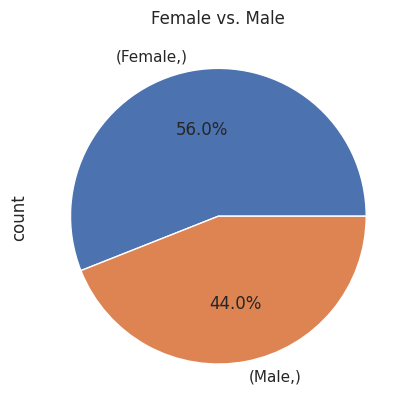

In [348]:
data_obj.value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Female vs. Male")

/tmp/ipykernel_37730/4022776951.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.barplot(data=data_sample, x='Age', y='Annual Income (k$)',color = 'red',hue='Gender')


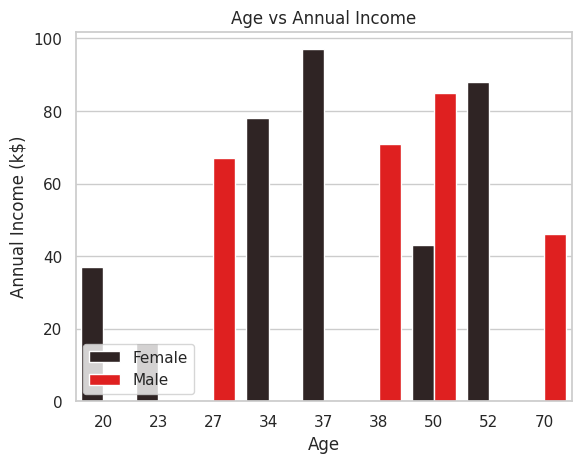

In [349]:
sns.barplot(data=data_sample, x='Age', y='Annual Income (k$)',color = 'red',hue='Gender')
plt.title('Age vs Annual Income')
plt.legend(loc='lower left')
plt.show()

In [350]:
transformed_data = LabelEncoder()
data.Gender = transformed_data.fit_transform(data.Gender)
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [351]:
culsters = []
score = []
for i in range(1,14):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    culsters.append(i)
    score.append(kmeans.inertia_)
print(culsters)
print(score)

/home/ali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[975512.06, 387065.7137713771, 271396.5629660315, 195401.19855991466, 157505.72072477572, 122601.9374673226, 103273.68916130907, 86053.67444777445, 77625.35619559651, 69168.38828547818, 64276.20951658459, 60778.32661042088, 56968.52455731403]


/home/ali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

In [352]:
data_1 = pd.DataFrame({'Clusters':culsters, 'Score':score})
data_1

,Clusters,Score
0,1,975512.060000
1,2,387065.713771
2,3,271396.562966
3,4,195401.198560
4,5,157505.720725
5,6,122601.937467
6,7,103273.689161
7,8,86053.674448
8,9,77625.356196
9,10,69168.388285


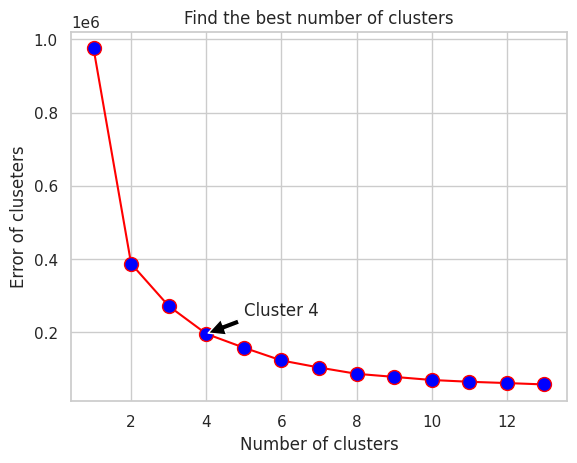

In [353]:
plt.plot(culsters,score,marker='o',color='red',markerfacecolor='blue',markersize=10)
plt.xlabel('Number of clusters')
plt.ylabel('Error of cluseters')
plt.title('Find the best number of clusters')
plt.annotate('Cluster 4', xy=(4, score[3]), xytext=(5, score[3] + 50000),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()


In [354]:
Kmeans = KMeans(n_clusters=4)
Kmeans.fit(data)
pre = Kmeans.predict(data)

/home/ali/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [355]:
data['Kmeans'] = pre
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kmeans
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0
...,...,...,...,...,...,...
195,196,0,35,120,79,3
196,197,0,45,126,28,1
197,198,1,32,126,74,3
198,199,1,32,137,18,1


In [356]:
data_0=data[data['Kmeans'] == 0]
data_1=data[data['Kmeans'] == 1]
data_2=data[data['Kmeans'] == 2]    
data_3=data[data['Kmeans'] == 3]
clusters = pd.concat([
    pd.DataFrame(data_0).assign(Cluster='Cluster 0'),
    pd.DataFrame(data_1).assign(Cluster='Cluster 1'),
    pd.DataFrame(data_2).assign(Cluster='Cluster 2'),
    pd.DataFrame(data_3).assign(Cluster='Cluster 3')
])

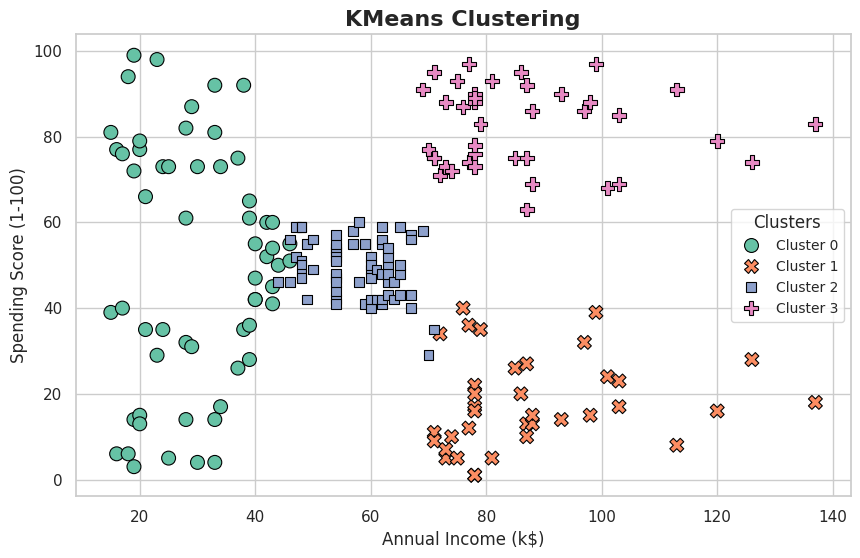

In [357]:
sns.set(style="whitegrid")  # Set style
palette = sns.color_palette("Set2", n_colors=4)  # Custom color palette

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clusters,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    style='Cluster',
    palette=palette,
    s=100,  # Marker size
    edgecolor='black'  # Edge color for markers
)

# Add details
plt.title('KMeans Clustering', fontsize=16, weight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Clusters', fontsize=10)
plt.show()

/tmp/ipykernel_37730/1595532396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kmeans', data=data, palette='Set2')


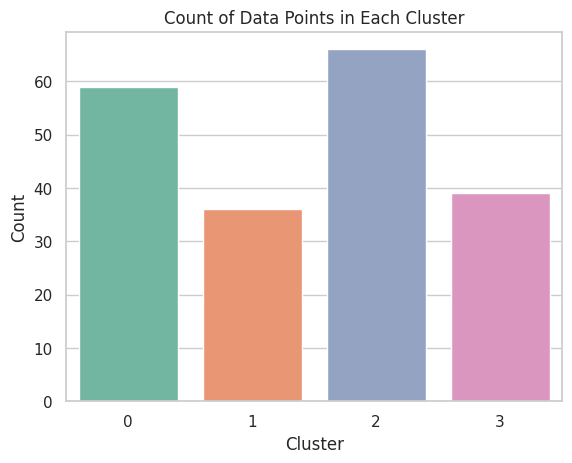

In [358]:
data_0_0 = (data['Kmeans'] == 0).sum()
data_0_1 = (data['Kmeans'] == 1).sum()
data_0_2 = (data['Kmeans'] == 2).sum()
data_0_3 = (data['Kmeans'] == 3).sum()
sns.countplot(x='Kmeans', data=data, palette='Set2')
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

/tmp/ipykernel_37730/1185595563.py:5: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x=data.Kmeans, hue=data.Gender, palette=palette)


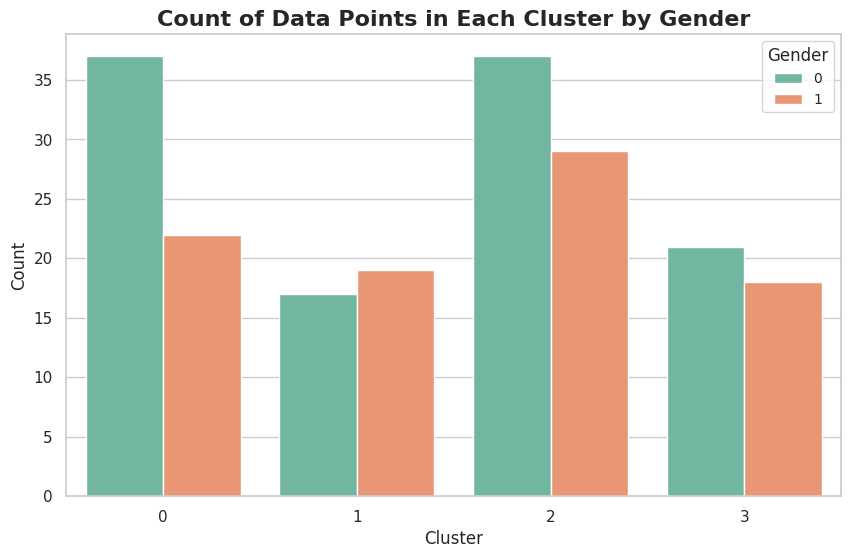

In [359]:
sns.set(style="whitegrid")  
palette = sns.color_palette("Set2")  

plt.figure(figsize=(10, 6))
sns.countplot(x=data.Kmeans, hue=data.Gender, palette=palette)

plt.title('Count of Data Points in Each Cluster by Gender', fontsize=16, weight='bold')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Gender', fontsize=10)
plt.show()

In [360]:
st = StandardScaler()
st.fit(data)

StandardScaler()

In [361]:
clusters = pd.concat([
    pd.DataFrame(data_0).assign(Cluster='Cluster 0'),
    pd.DataFrame(data_1).assign(Cluster='Cluster 1'),
    pd.DataFrame(data_2).assign(Cluster='Cluster 2'),
    pd.DataFrame(data_3).assign(Cluster='Cluster 3')
])

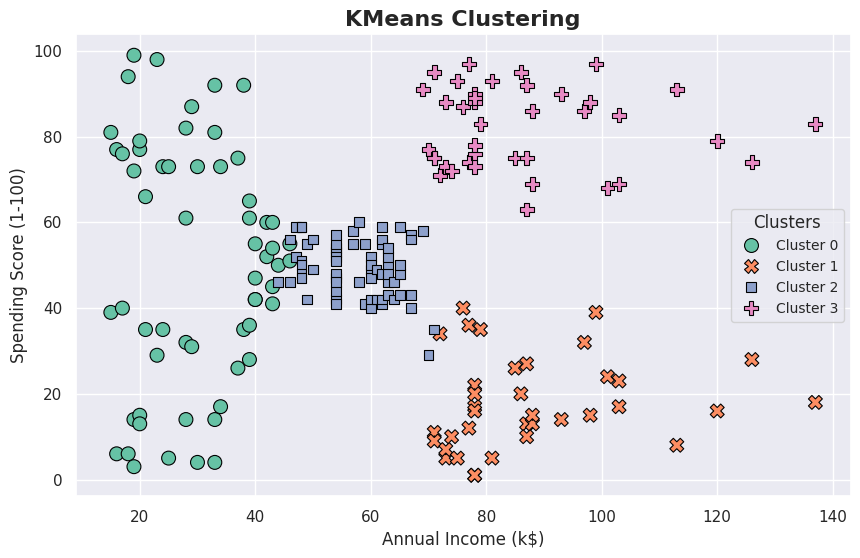

In [362]:
sns.set_theme()
palette = sns.color_palette("Set2", n_colors=4)  
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=clusters,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    style='Cluster',
    palette=palette,
    s=100, 
    edgecolor='black'  # Edge color for markers
)
plt.title('KMeans Clustering', fontsize=16, weight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend(title='Clusters', fontsize=10)
plt.show()

<Axes: ylabel='count'>

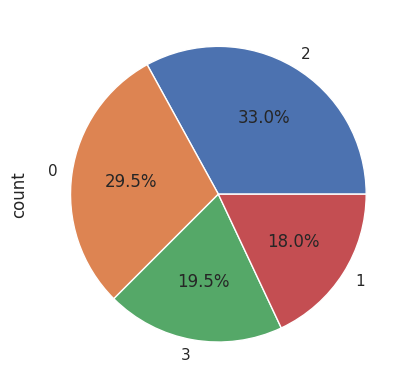

In [363]:
data['Kmeans'].value_counts().plot.pie(autopct='%1.1f%%')

/tmp/ipykernel_37730/1595532396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Kmeans', data=data, palette='Set2')


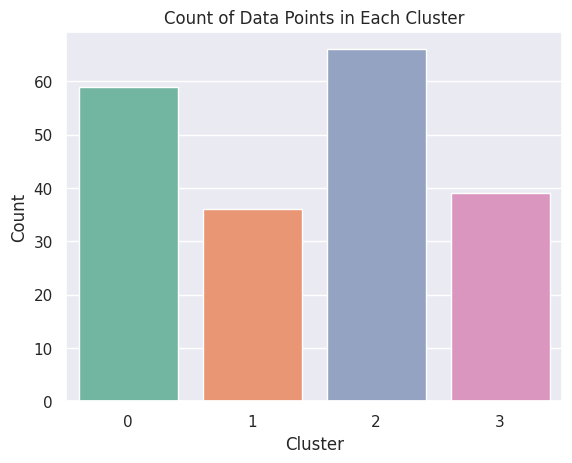

In [364]:
data_0_0 = (data['Kmeans'] == 0).sum()
data_0_1 = (data['Kmeans'] == 1).sum()
data_0_2 = (data['Kmeans'] == 2).sum()
data_0_3 = (data['Kmeans'] == 3).sum()
sns.countplot(x='Kmeans', data=data, palette='Set2')
plt.title('Count of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='count'>

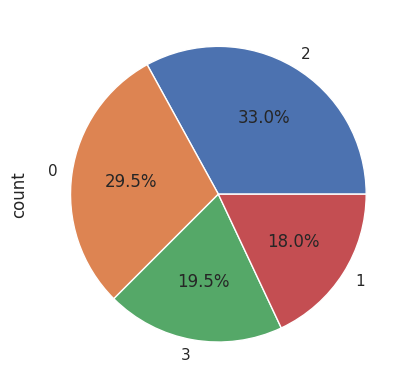

In [365]:
data['Kmeans'].value_counts().plot.pie(autopct='%1.1f%%')

/tmp/ipykernel_37730/3592827893.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data.Kmeans, y=data['Annual Income (k$)'], palette="Set2")


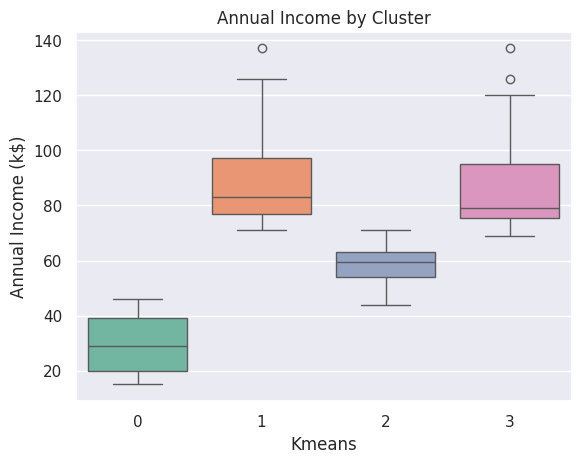

In [366]:
sns.boxplot(x=data.Kmeans, y=data['Annual Income (k$)'], palette="Set2")
plt.title('Annual Income by Cluster')
plt.show()